In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('../Dataset/Raw/AI_Impact_on_Jobs_2030.csv')

In [8]:
df.head()   # Shows the first 5 rows
df.columns

Index(['Job_Title', 'Average_Salary', 'Years_Experience', 'Education_Level',
       'AI_Exposure_Index', 'Tech_Growth_Factor',
       'Automation_Probability_2030', 'Risk_Category', 'Skill_1', 'Skill_2',
       'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8',
       'Skill_9', 'Skill_10'],
      dtype='object')

In [10]:
from IPython.display import display

display(df.head(5))

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [ ]:
html = df.head(5).to_html()
with open('../output.html', 'w') as f:
    f.write(html)

In [ ]:
# Hypothesis 1 ETL: Prepare data for entry-level or graduate jobs at higher risk of automation

# Filter for entry-level jobs (low experience, e.g., <= 5 years) or graduate jobs (higher education: Master's or PhD)
df_h1 = df[(df['Years_Experience'] <= 5) | (df['Education_Level'].isin(['master\'s', 'phd']))]

# Separate into routine/manual tasks (High risk) and cognitive/creative roles (Low risk)
df_routine = df_h1[df_h1['Risk_Category'] == 'High']
df_cognitive = df_h1[df_h1['Risk_Category'] == 'Low']

# Save the filtered datasets for analysis
df_h1.to_csv('../Dataset/Cleaned/hypothesis1_data.csv', index=False)
df_routine.to_csv('../Dataset/Cleaned/hypothesis1_routine.csv', index=False)
df_cognitive.to_csv('../Dataset/Cleaned/hypothesis1_cognitive.csv', index=False)

print("Hypothesis 1 data prepared and saved.")
print(f"Total jobs in H1: {len(df_h1)}")
print(f"Routine/manual jobs: {len(df_routine)}")
print(f"Cognitive/creative jobs: {len(df_cognitive)}")

# Matplotlib visualization
plt.figure(figsize=(8, 5))
risk_counts = df_h1['Risk_Category'].value_counts()
plt.bar(risk_counts.index, risk_counts.values, color=['red', 'orange', 'green'])
plt.title('Automation Risk Distribution (Hypothesis 1 - Matplotlib)')
plt.xlabel('Risk Category')
plt.ylabel('Number of Jobs')
plt.show()

# Seaborn visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette='Set2')
plt.title('Automation Risk Distribution (Hypothesis 1 - Seaborn)')
plt.xlabel('Risk Category')
plt.ylabel('Number of Jobs')
plt.show()

# Plotly visualization
risk_df = risk_counts.reset_index()
risk_df.columns = ['Risk_Category', 'Count']
fig = px.bar(risk_df, x='Risk_Category', y='Count', title='Automation Risk Distribution (Hypothesis 1 - Plotly)', color='Risk_Category')
fig.show()

In [ ]:
# Hypothesis 2 ETL: Prepare summary for jobs by education level and average automation risk

# Group by education level and calculate average automation risk
df_h2 = df.groupby('Education_Level')['Automation_Probability_2030'].mean().reset_index()
df_h2.rename(columns={'Automation_Probability_2030': 'Average_Risk'}, inplace=True)

# Save the summary
df_h2.to_csv('../Dataset/Cleaned/hypothesis2_summary.csv', index=False)
print("Hypothesis 2 summary saved.")
print(df_h2)

# Matplotlib visualization
plt.figure(figsize=(8, 5))
plt.bar(df_h2['Education_Level'], df_h2['Average_Risk'], color='skyblue')
plt.title('Average Automation Risk by Education Level (Hypothesis 2 - Matplotlib)')
plt.xlabel('Education Level')
plt.ylabel('Average Automation Probability')
plt.show()

# Seaborn visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=df_h2, x='Education_Level', y='Average_Risk', palette='Blues')
plt.title('Average Automation Risk by Education Level (Hypothesis 2 - Seaborn)')
plt.xlabel('Education Level')
plt.ylabel('Average Automation Probability')
plt.show()

Hypothesis 3 correlations saved.
      Skill  Correlation_with_Risk
0   Skill_1               0.047019
1   Skill_2              -0.014156
2   Skill_3              -0.064279
3   Skill_4               0.046714
4   Skill_5              -0.086102
5   Skill_6              -0.011142
6   Skill_7               0.021477
7   Skill_8               0.025712
8   Skill_9               0.039865
9  Skill_10               0.005834


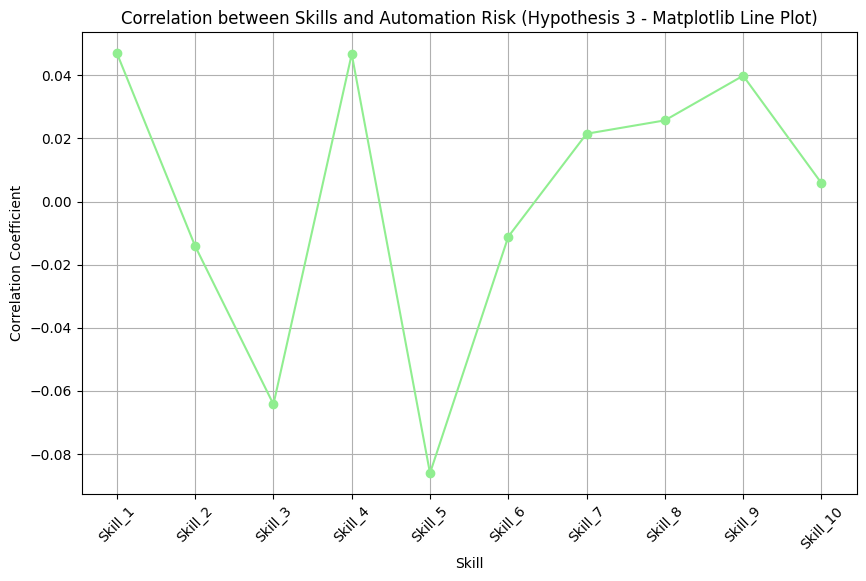

ValueError: Could not interpret value `Average_Risk` for `y`. An entry with this name does not appear in `data`.

In [ ]:
# Hypothesis 3 ETL: Prepare correlations between skills and automation risk

# Identify skill columns
skill_cols = [f'Skill_{i}' for i in range(1, 11)]

# Calculate correlations with automation risk
correlations = df[skill_cols + ['Automation_Probability_2030']].corr()['Automation_Probability_2030'].drop('Automation_Probability_2030')
df_h3 = correlations.reset_index()
df_h3.columns = ['Skill', 'Correlation_with_Risk']

# Save the correlations
df_h3.to_csv('../Dataset/Cleaned/hypothesis3_correlations.csv', index=False)
print("Hypothesis 3 correlations saved.")
print(df_h3)

# Matplotlib visualization - Line plot
plt.figure(figsize=(10, 6))
plt.plot(df_h3['Skill'], df_h3['Correlation_with_Risk'], marker='o', color='lightgreen', linestyle='-')
plt.title('Correlation between Skills and Automation Risk (Hypothesis 3 - Matplotlib Line Plot)')
plt.xlabel('Skill')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Seaborn visualization - Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_h3, x='Skill', y='Correlation_with_Risk', palette='viridis', s=100)
plt.title('Correlation between Skills and Automation Risk (Hypothesis 3 - Seaborn Scatter Plot)')
plt.xlabel('Skill')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Save datasets
df_h1.to_csv('../Dataset/Cleaned/hypothesis1_data.csv', index=False)
df_routine.to_csv('../Dataset/Cleaned/hypothesis1_routine.csv', index=False)
df_cognitive.to_csv('../Dataset/Cleaned/hypothesis1_cognitive.csv', index=False)

In [ ]:
# Save summary
df_h2.to_csv('../Dataset/Cleaned/hypothesis2_summary.csv', index=False)

print("Hypothesis 2 summary saved.")
print(df_h2)

In [ ]:

# Save correlations

df_h3.to_csv('../Dataset/Cleaned/hypothesis3_correlations.csv', index=False)

print("Hypothesis 3 correlations saved.")
print(df_h3)


In [ ]:
# Hypothesis 1 ETL
# Entry-level (<=5 years) OR Graduate (Master's / PhD)

df_h1 = df[
    (df['Years_Experience'] <= 5) |
    (df['Education_Level'].isin(["master's", "phd"]))
]

df_h1['Risk_Category'] = df_h1['Risk_Category'].str.lower()

df_routine = df_h1[df_h1['Risk_Category'] == 'high']
df_cognitive = df_h1[df_h1['Risk_Category'] == 'low']


print("Hypothesis 1 data prepared and saved.")
print(f"Total jobs in H1: {len(df_h1)}")
print(f"Routine/manual jobs (High risk): {len(df_routine)}")
print(f"Cognitive/creative jobs (Low risk): {len(df_cognitive)}")

# Risk distribution
risk_counts = df_h1['Risk_Category'].value_counts()



# Plotly visualization
risk_df = risk_counts.reset_index()
risk_df.columns = ['Risk_Category', 'Count']

fig = px.bar(
    risk_df,
    x='Risk_Category',
    y='Count',
    color='Risk_Category',
    title='Automation Risk Distribution (Hypothesis 1 - Plotly)'
)

fig.show()   

NameError: name 'df' is not defined